# Goals


### Understand the role of number of epochs in transfer learning


### Till what point increasing epochs helps in imporving acuracy


### How overtraining can result in overfitting the data


### You will be using skin-cancer mnist to train the classifiers

# Table of Contents


## [0. Install](#0)


## [1. Train a resnet18 network for 5 epochs](#1)


## [2. Re-Train a new experiment for 10 epochs](#2)


## [3. Re-Train a third experiment for 20 epochs](#3)


## [4. Compare the experiments](#4)

<a id='0'></a>
# Install Monk
  
 - git clone https://github.com/Tessellate-Imaging/monk_v1.git
 
 - cd monk_v1/installation && pip install -r requirements_cu9.txt
     - (Select the requirements file as per OS and CUDA version)

In [3]:
!git clone https://github.com/Tessellate-Imaging/monk_v1.git

Cloning into 'monk_v1'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 1922 (delta 8), reused 16 (delta 7), pack-reused 1905
Receiving objects: 100% (1922/1922), 69.95 MiB | 15.27 MiB/s, done.
Resolving deltas: 100% (1028/1028), done.


In [ ]:
# Select the requirements file as per OS and CUDA version
!cd monk_v1/installation && pip install -r requirements_cu9.txt

## Dataset Details
    - Credits: https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000
    
    - Seven classes
        - benign_keratosis_like_lesions
        - melanocytic_nevi
        - dermatofibroma
        - melanoma
        - vascular_lesions
        - basal_cell_carcinoma
        - Bowens_disease

### Download the dataset

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1MRC58-oCdR1agFTWreDFqevjEOIWDnYZ' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1MRC58-oCdR1agFTWreDFqevjEOIWDnYZ" -O skin_cancer_mnist_dataset.zip && rm -rf /tmp/cookies.txt

In [3]:
! unzip -qq skin_cancer_mnist_dataset.zip

# Imports

In [1]:
# Monk
import os
import sys
sys.path.append("monk_v1/monk/");

In [2]:
#Using pytorch backend 
from pytorch_prototype import prototype

<a id='1'></a>
# Train a resnet18 network for 5 epochs

## Creating and managing experiments
    - Provide project name
    - Provide experiment name
    - For a specific data create a single project
    - Inside each project multiple experiments can be created
    - Every experiment can be have diferent hyper-parameters attached to it

In [4]:
gtf = prototype(verbose=1);
gtf.Prototype("Project", "Epochs-5");

Pytorch Version: 1.2.0

Experiment Details
    Project: Project
    Experiment: Epochs-5
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/5_transfer_learning_params/3_training_epochs/workspace/Project/Epochs-5/



### This creates files and directories as per the following structure
    
    
    workspace
        |
        |--------Project
                        |
                        |
                        |-----Freeze_Base_Network
                                    |
                                    |-----experiment-state.json
                                    |
                                    |-----output
                                            |
                                            |------logs (All training logs and graphs saved here)
                                            |
                                            |------models (all trained models saved here)
                                    

## Set dataset and select the model

## Quick mode training

    - Using Default Function
        - dataset_path
        - model_name
        - freeze_base_network
        - num_epochs
        
        
## Sample Dataset folder structure

    parent_directory
        |
        |
        |------cats
                |
                |------img1.jpg
                |------img2.jpg
                |------.... (and so on)
        |------dogs
                |
                |------img1.jpg
                |------img2.jpg
                |------.... (and so on)     

## Modifyable params 
    - dataset_path: path to data
    - model_name: which pretrained model to use
    - freeze_base_network: Retrain already trained network or not
    - num_epochs: Number of epochs to train for

In [5]:
gtf.Default(dataset_path="skin_cancer_mnist_dataset/images",
            path_to_csv="skin_cancer_mnist_dataset/train_labels.csv",
            model_name="resnet18", 
            freeze_base_network=True,
            
            
            
            num_epochs=5);     #Set number of epochs here

#Read the summary generated once you run this cell. 

Dataset Details
    Train path:     skin_cancer_mnist_dataset/images
    Val path:       None
    CSV train path: skin_cancer_mnist_dataset/train_labels.csv
    CSV val path:  None

Dataset Params
    Input Size:  224
    Batch Size:  4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7
    Delimiter:   ,

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 7010
    Num val images:   3005
    Num classes:      7

Model Params
    Model name:           resnet18
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  True

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           resnet18
        Num layer

## From summary above

    Training params
        Num Epochs: 5

## Train the classifier

In [10]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
    Epoch 1/5
    ----------




    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.643, Train-loss: 1.098 | Val-acc: 0.658236, Val-loss: 0.943, | time: 75.1 sec

    Epoch 2/5
    ----------




    curr_lr - 0.01
    [Epoch 2] Train-acc: 0.680, Train-loss: 0.984 | Val-acc: 0.744759, Val-loss: 0.887, | time: 69.9 sec

    Epoch 3/5
    ----------




    curr_lr - 0.01
    [Epoch 3] Train-acc: 0.681, Train-loss: 0.962 | Val-acc: 0.742429, Val-loss: 0.845, | time: 78.9 sec

    Epoch 4/5
    ----------




    curr_lr - 0.01
    [Epoch 4] Train-acc: 0.682, Train-loss: 0.947 | Val-acc: 0.742429, Val-loss: 0.896, | time: 73.7 sec

    Epoch 5/5
    ----------




    curr_lr - 0.01
    [Epoch 5] Train-acc: 0.682, Train-loss: 0.955 | Val-acc: 0.744759, Val-loss: 0.811, | time: 74.4 sec

    Training completed in: 6m 11s
    Best val Acc:          0.744759

Training End

Training Outputs
    Model Dir:   /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/quick_prototyping/2_trasfer_learning_base/appendix_notebooks/workspace/Project/Epochs-5/output/models/
    Log Dir:     /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/quick_prototyping/2_trasfer_learning_base/appendix_notebooks/workspace/Project/Epochs-5/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc_history.npy
    Log 4 - Training loss history log:       train_loss_history.

<Figure size 432x288 with 0 Axes>

### Final training loss - 0.955

### Final validation loss - 0.811

(You may get a different result)

<a id='2'></a>
#  Re-Train a new experiment for 10 epochs

## Creating and managing experiments
    - Provide project name
    - Provide experiment name
    - For a specific data create a single project
    - Inside each project multiple experiments can be created
    - Every experiment can be have diferent hyper-parameters attached to it

In [6]:
gtf = prototype(verbose=1);
gtf.Prototype("Project", "Epochs-10");

Pytorch Version: 1.2.0

Experiment Details
    Project: Project
    Experiment: Epochs-10
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/5_transfer_learning_params/3_training_epochs/workspace/Project/Epochs-10/



### This creates files and directories as per the following structure
    
    
    workspace
        |
        |--------Project
                    |
                    |
                    |-----Epochs-5 (Previously created)
                                |
                                |-----experiment-state.json
                                |
                                |-----output
                                        |
                                        |------logs (All training logs and graphs saved here)
                                        |
                                        |------models (all trained models saved here)
                     |
                     |
                     |-----Epochs-10 (Created Now)
                                |
                                |-----experiment-state.json
                                |
                                |-----output
                                        |
                                        |------logs (All training logs and graphs saved here)
                                        |
                                        |------models (all trained models saved here)

## Set dataset and select the model

## Quick mode training

    - Using Default Function
        - dataset_path
        - model_name
        - freeze_base_network
        - num_epochs
        
        
## Sample Dataset folder structure

    parent_directory
        |
        |
        |------cats
                |
                |------img1.jpg
                |------img2.jpg
                |------.... (and so on)
        |------dogs
                |
                |------img1.jpg
                |------img2.jpg
                |------.... (and so on)

## Modifyable params 
    - dataset_path: path to data
    - model_name: which pretrained model to use
    - freeze_base_network: Retrain already trained network or not
    - num_epochs: Number of epochs to train for

In [7]:
gtf.Default(dataset_path="skin_cancer_mnist_dataset/images",
            path_to_csv="skin_cancer_mnist_dataset/train_labels.csv",
            model_name="resnet18", 
            freeze_base_network=True,
            
            
            
            num_epochs=10);     #Set number of epochs here

#Read the summary generated once you run this cell. 

Dataset Details
    Train path:     skin_cancer_mnist_dataset/images
    Val path:       None
    CSV train path: skin_cancer_mnist_dataset/train_labels.csv
    CSV val path:  None

Dataset Params
    Input Size:  224
    Batch Size:  4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7
    Delimiter:   ,

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 7010
    Num val images:   3005
    Num classes:      7

Model Params
    Model name:           resnet18
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  True

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           resnet18
        Num layer

## From summary above

    Training params
        Num Epochs: 10

## Train the classifier

In [13]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
    Epoch 1/10
    ----------




    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.645, Train-loss: 1.090 | Val-acc: 0.721464, Val-loss: 1.015, | time: 67.5 sec

    Epoch 2/10
    ----------




    curr_lr - 0.01
    [Epoch 2] Train-acc: 0.670, Train-loss: 0.999 | Val-acc: 0.386356, Val-loss: 2.057, | time: 69.1 sec

    Epoch 3/10
    ----------




    curr_lr - 0.01
    [Epoch 3] Train-acc: 0.678, Train-loss: 0.976 | Val-acc: 0.751414, Val-loss: 0.756, | time: 75.0 sec

    Epoch 4/10
    ----------




    curr_lr - 0.01
    [Epoch 4] Train-acc: 0.677, Train-loss: 0.979 | Val-acc: 0.566722, Val-loss: 1.327, | time: 71.7 sec

    Epoch 5/10
    ----------




    curr_lr - 0.01
    [Epoch 5] Train-acc: 0.684, Train-loss: 0.953 | Val-acc: 0.750416, Val-loss: 0.842, | time: 73.3 sec

    Epoch 6/10
    ----------




    curr_lr - 0.01
    [Epoch 6] Train-acc: 0.682, Train-loss: 0.953 | Val-acc: 0.716473, Val-loss: 1.183, | time: 74.0 sec

    Epoch 7/10
    ----------


Epoch     6: reducing learning rate of group 0 to 1.0000e-03.


    curr_lr - 0.001
    [Epoch 7] Train-acc: 0.693, Train-loss: 0.920 | Val-acc: 0.736772, Val-loss: 0.936, | time: 69.1 sec

    Epoch 8/10
    ----------




    curr_lr - 0.001
    [Epoch 8] Train-acc: 0.735, Train-loss: 0.754 | Val-acc: 0.765058, Val-loss: 0.710, | time: 68.6 sec

    Epoch 9/10
    ----------




    curr_lr - 0.001
    [Epoch 9] Train-acc: 0.733, Train-loss: 0.761 | Val-acc: 0.755408, Val-loss: 0.710, | time: 71.2 sec

    Epoch 10/10
    ----------




    curr_lr - 0.001
    [Epoch 10] Train-acc: 0.736, Train-loss: 0.747 | Val-acc: 0.755740, Val-loss: 0.722, | time: 70.7 sec

    Training completed in: 11m 47s
    Best val Acc:          0.765058

Training End

Training Outputs
    Model Dir:   /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/quick_prototyping/2_trasfer_learning_base/appendix_notebooks/workspace/Project/Epochs-10/output/models/
    Log Dir:     /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/quick_prototyping/2_trasfer_learning_base/appendix_notebooks/workspace/Project/Epochs-10/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc_history.npy
    Log 4 - Training loss history log:       train_loss_his

<Figure size 432x288 with 0 Axes>

### Final training loss - 0.747

### Final validation loss - 0.722

(You may get a different result)

<a id='3'></a>
#  Re-Train a third experiment for 20 epochs

## Creating and managing experiments
    - Provide project name
    - Provide experiment name
    - For a specific data create a single project
    - Inside each project multiple experiments can be created
    - Every experiment can be have diferent hyper-parameters attached to it

In [8]:
gtf = prototype(verbose=1);
gtf.Prototype("Project", "Epochs-20");

Pytorch Version: 1.2.0

Experiment Details
    Project: Project
    Experiment: Epochs-20
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/5_transfer_learning_params/3_training_epochs/workspace/Project/Epochs-20/



### This creates files and directories as per the following structure
    
    
    workspace
        |
        |--------Project
                    |
                    |
                    |-----Epochs-5 (Previously created)
                                |
                                |-----experiment-state.json
                                |
                                |-----output
                                        |
                                        |------logs (All training logs and graphs saved here)
                                        |
                                        |------models (all trained models saved here)
                     |
                     |
                     |-----Epochs-10 (Previously Created)
                                |
                                |-----experiment-state.json
                                |
                                |-----output
                                        |
                                        |------logs (All training logs and graphs saved here)
                                        |
                                        |------models (all trained models saved here)
                     |
                     |
                     |-----Epochs-20 (Created Now)
                                |
                                |-----experiment-state.json
                                |
                                |-----output
                                        |
                                        |------logs (All training logs and graphs saved here)
                                        |
                                        |------models (all trained models saved here)

## Modifyable params 
    - dataset_path: path to data
    - model_name: which pretrained model to use
    - freeze_base_network: Retrain already trained network or not
    - num_epochs: Number of epochs to train for

In [9]:
gtf.Default(dataset_path="skin_cancer_mnist_dataset/images",
            path_to_csv="skin_cancer_mnist_dataset/train_labels.csv",
            model_name="resnet18", 
            freeze_base_network=True,
            
            
            
            num_epochs=20);     #Set number of epochs here

#Read the summary generated once you run this cell. 

Dataset Details
    Train path:     skin_cancer_mnist_dataset/images
    Val path:       None
    CSV train path: skin_cancer_mnist_dataset/train_labels.csv
    CSV val path:  None

Dataset Params
    Input Size:  224
    Batch Size:  4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7
    Delimiter:   ,

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 7010
    Num val images:   3005
    Num classes:      7

Model Params
    Model name:           resnet18
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  True

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           resnet18
        Num layer

## From summary above

    Training params
        Num Epochs: 20

## Train the classifier

In [19]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
    Epoch 1/20
    ----------




    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.700, Train-loss: 0.915 | Val-acc: 0.736439, Val-loss: 0.915, | time: 72.6 sec

    Epoch 2/20
    ----------


Epoch    21: reducing learning rate of group 0 to 1.0000e-03.


    curr_lr - 0.001
    [Epoch 2] Train-acc: 0.700, Train-loss: 0.907 | Val-acc: 0.730782, Val-loss: 0.884, | time: 67.3 sec

    Epoch 3/20
    ----------




    curr_lr - 0.001
    [Epoch 3] Train-acc: 0.739, Train-loss: 0.725 | Val-acc: 0.734775, Val-loss: 0.778, | time: 67.4 sec

    Epoch 4/20
    ----------




    curr_lr - 0.001
    [Epoch 4] Train-acc: 0.740, Train-loss: 0.715 | Val-acc: 0.754742, Val-loss: 0.758, | time: 69.4 sec

    Epoch 5/20
    ----------




    curr_lr - 0.001
    [Epoch 5] Train-acc: 0.741, Train-loss: 0.722 | Val-acc: 0.737770, Val-loss: 0.792, | time: 71.7 sec

    Epoch 6/20
    ----------




    curr_lr - 0.001
    [Epoch 6] Train-acc: 0.744, Train-loss: 0.718 | Val-acc: 0.739767, Val-loss: 0.773, | time: 69.6 sec

    Epoch 7/20
    ----------




    curr_lr - 0.001
    [Epoch 7] Train-acc: 0.746, Train-loss: 0.713 | Val-acc: 0.729784, Val-loss: 0.779, | time: 70.4 sec

    Epoch 8/20
    ----------




    curr_lr - 0.001
    [Epoch 8] Train-acc: 0.746, Train-loss: 0.711 | Val-acc: 0.755075, Val-loss: 0.773, | time: 70.0 sec

    Epoch 9/20
    ----------




    curr_lr - 0.001
    [Epoch 9] Train-acc: 0.748, Train-loss: 0.701 | Val-acc: 0.751082, Val-loss: 0.759, | time: 69.6 sec

    Epoch 10/20
    ----------




    curr_lr - 0.001
    [Epoch 10] Train-acc: 0.750, Train-loss: 0.708 | Val-acc: 0.742429, Val-loss: 0.749, | time: 67.8 sec

    Epoch 11/20
    ----------




    curr_lr - 0.001
    [Epoch 11] Train-acc: 0.742, Train-loss: 0.705 | Val-acc: 0.743760, Val-loss: 0.736, | time: 68.9 sec

    Epoch 12/20
    ----------




    curr_lr - 0.001
    [Epoch 12] Train-acc: 0.747, Train-loss: 0.716 | Val-acc: 0.746090, Val-loss: 0.737, | time: 67.4 sec

    Epoch 13/20
    ----------




    curr_lr - 0.001
    [Epoch 13] Train-acc: 0.743, Train-loss: 0.717 | Val-acc: 0.739101, Val-loss: 0.741, | time: 73.8 sec

    Epoch 14/20
    ----------




    curr_lr - 0.001
    [Epoch 14] Train-acc: 0.750, Train-loss: 0.703 | Val-acc: 0.756739, Val-loss: 0.723, | time: 74.9 sec

    Epoch 15/20
    ----------




    curr_lr - 0.001
    [Epoch 15] Train-acc: 0.748, Train-loss: 0.706 | Val-acc: 0.753411, Val-loss: 0.706, | time: 71.7 sec

    Epoch 16/20
    ----------




    curr_lr - 0.001
    [Epoch 16] Train-acc: 0.745, Train-loss: 0.699 | Val-acc: 0.752745, Val-loss: 0.734, | time: 67.7 sec

    Epoch 17/20
    ----------




    curr_lr - 0.001
    [Epoch 17] Train-acc: 0.746, Train-loss: 0.703 | Val-acc: 0.759068, Val-loss: 0.701, | time: 67.8 sec

    Epoch 18/20
    ----------




    curr_lr - 0.001
    [Epoch 18] Train-acc: 0.747, Train-loss: 0.706 | Val-acc: 0.737438, Val-loss: 0.764, | time: 71.3 sec

    Epoch 19/20
    ----------




    curr_lr - 0.001
    [Epoch 19] Train-acc: 0.740, Train-loss: 0.707 | Val-acc: 0.753078, Val-loss: 0.745, | time: 71.3 sec

    Epoch 20/20
    ----------




    curr_lr - 0.001
    [Epoch 20] Train-acc: 0.745, Train-loss: 0.700 | Val-acc: 0.742429, Val-loss: 0.785, | time: 72.0 sec

    Training completed in: 49m 10s
    Best val Acc:          0.759068

Training End

Training Outputs
    Model Dir:   /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/quick_prototyping/2_trasfer_learning_base/appendix_notebooks/workspace/Project/Epochs-20/output/models/
    Log Dir:     /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/quick_prototyping/2_trasfer_learning_base/appendix_notebooks/workspace/Project/Epochs-20/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc_history.npy
    Log 4 - Training loss history log:       train_loss_his

<Figure size 432x288 with 0 Axes>

### Final training loss - 0.700

### Final validation loss - 0.785

(You may get a different result)

<a id='4'></a>
# Compare the experiments

In [20]:
# Invoke the comparison class
from compare_prototype import compare

### Creating and managing comparison experiments
        - Provide project name

In [21]:
# Create a project 
gtf = compare(verbose=1);
gtf.Comparison("Compare-effect-of-num-epochs");

Comparison: - Compare-effect-of-num-epochs


### This creates files and directories as per the following structure
    
    workspace
        |
        |--------comparison
                        |
                        |
                        |-----Compare-effect-of-num-epochs
                                    |
                                    |------stats_best_val_acc.png
                                    |------stats_max_gpu_usage.png
                                    |------stats_training_time.png
                                    |------train_accuracy.png
                                    |------train_loss.png
                                    |------val_accuracy.png
                                    |------val_loss.png
                                    
                        |
                        |-----comparison.csv (Contains necessary details of all experiments)

### Add the experiments
        - First argument - Project name
        - Second argument - Experiment name

In [22]:
gtf.Add_Experiment("Project", "Epochs-5");
gtf.Add_Experiment("Project", "Epochs-10");
gtf.Add_Experiment("Project", "Epochs-20");

Project - Project, Experiment - Epochs-5 added
Project - Project, Experiment - Epochs-10 added
Project - Project, Experiment - Epochs-20 added


### Run Analysis

In [23]:
gtf.Generate_Statistics();

Generating statistics...
Generated



<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

## Visualize and study comparison metrics

### Training Accuracy Curves

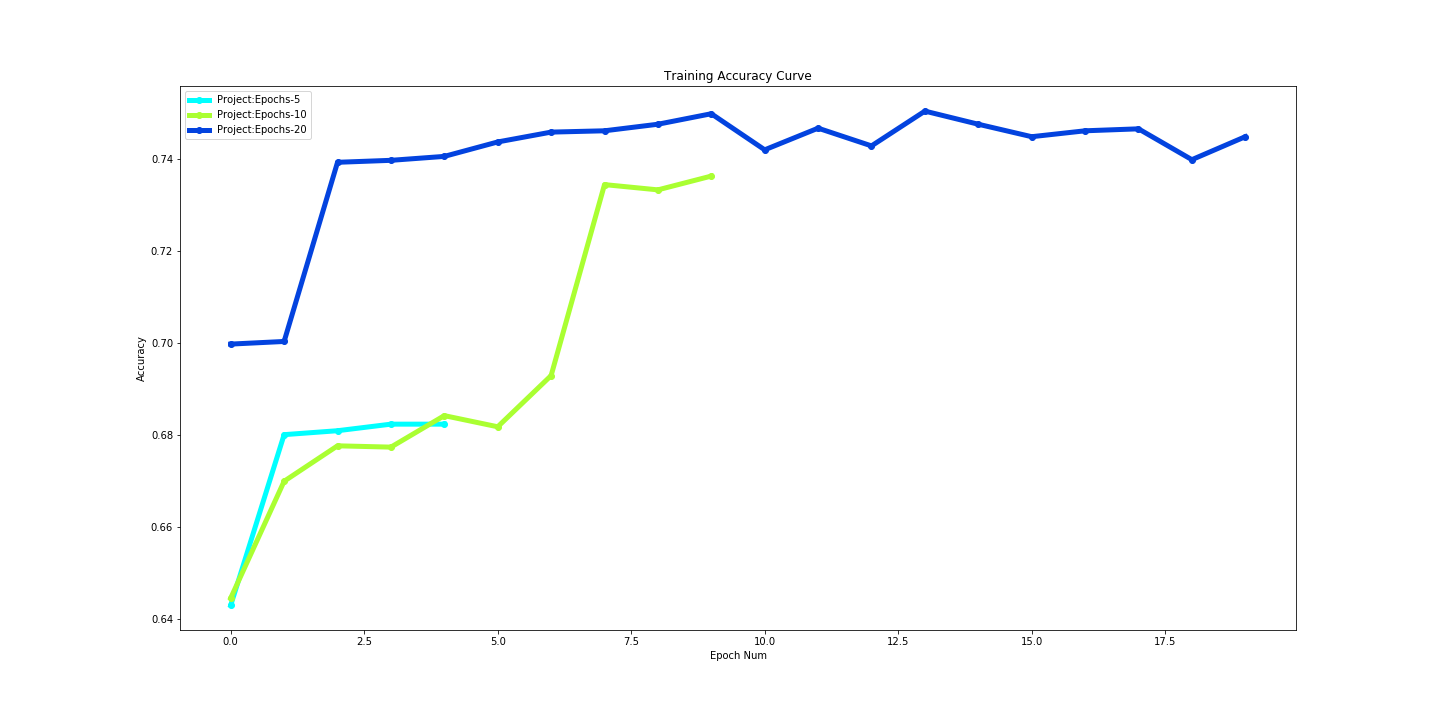

In [24]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-num-epochs/train_accuracy.png") 

### Training Loss Curves

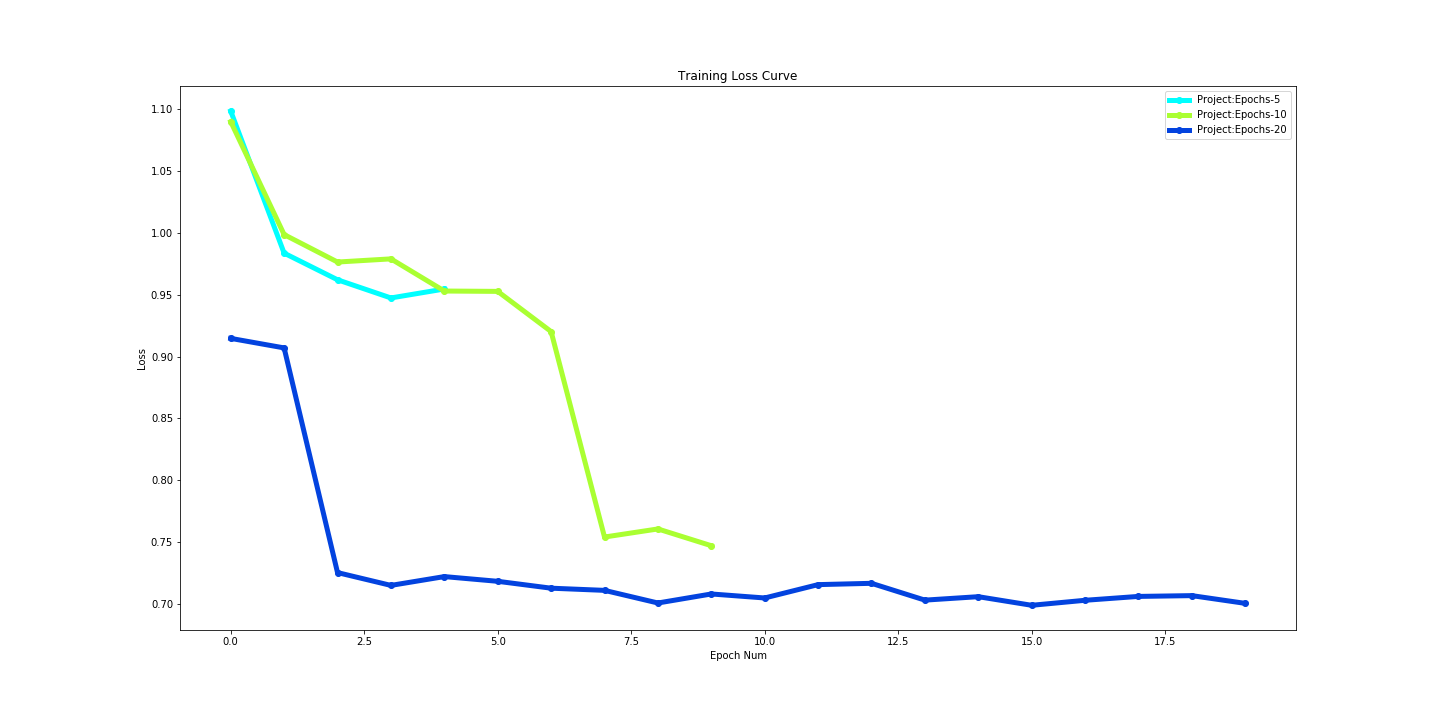

In [25]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-num-epochs/train_loss.png") 

### Validation Accuracy Curves

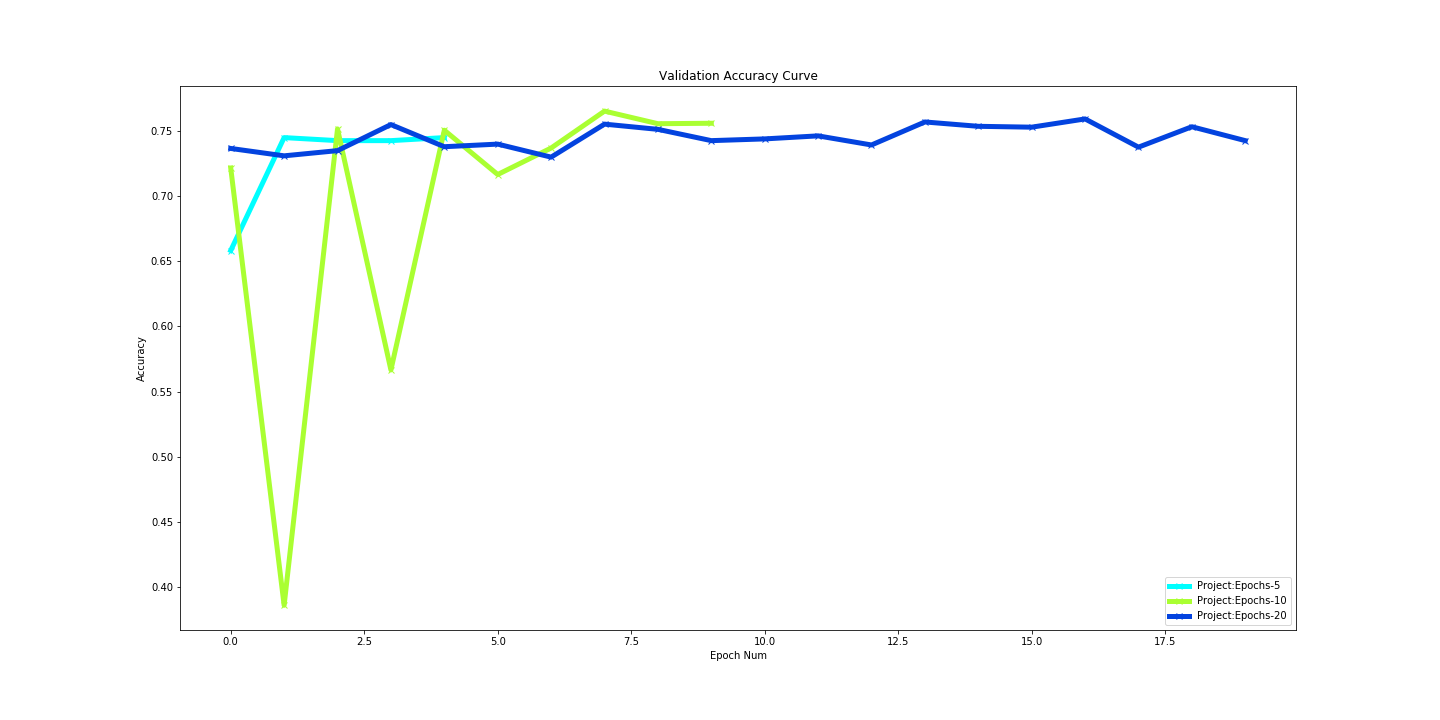

In [26]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-num-epochs/val_accuracy.png") 

### Validation loss curves

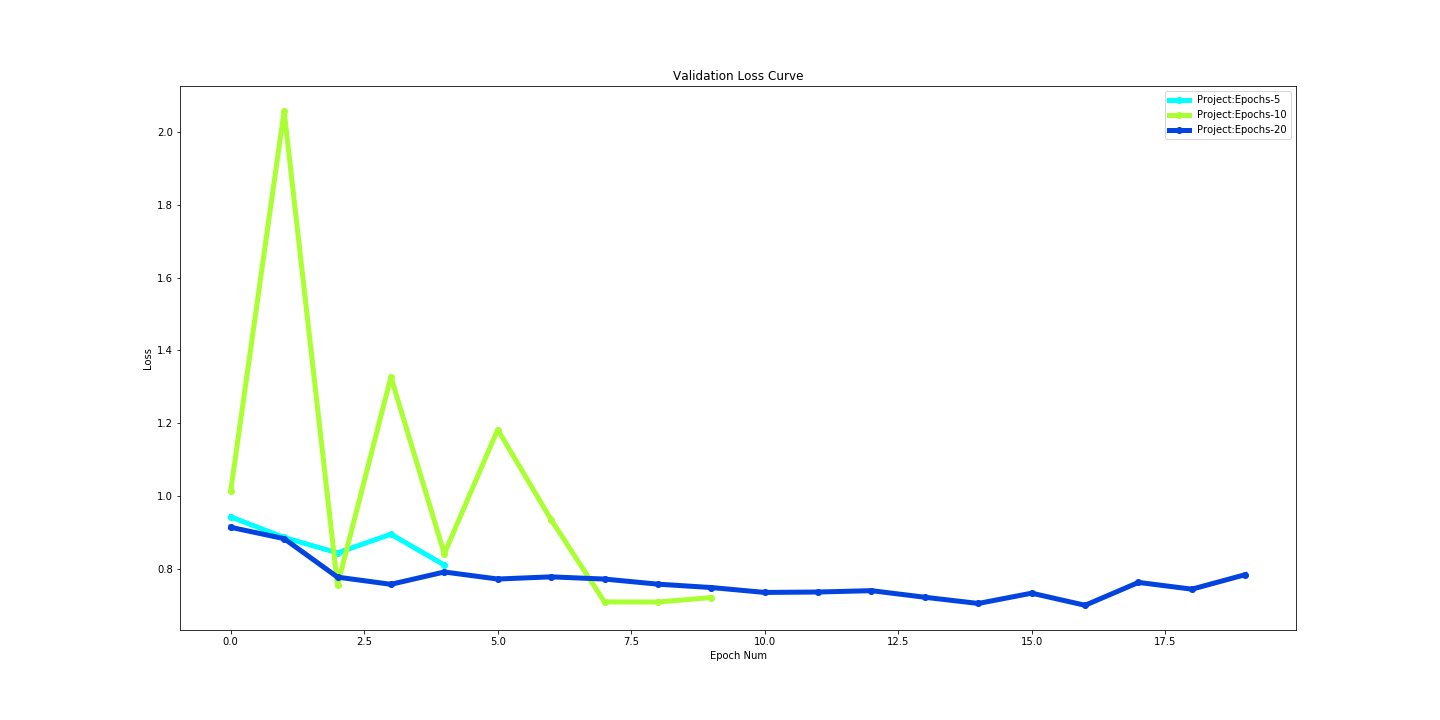

In [27]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-num-epochs/val_loss.png") 

## Training Accuracies achieved 

### With 5 epochs - 68.2%
### With 10 epochs - 73.6%
### With 20 epochs - 74.5%


## Validation accuracies achieved 

### With 5 epochs - 74.4%
### With 10 epochs - 75.5%
### With 20 epochs - 74.2%

#### Thing to note - After 7-8 epochs, accuracies and losses tend to saturate

(You may get a different result)